# Loading packages 

In [62]:
# Data wrangling 
import pandas as pd 

# Train test spliting 
from sklearn.model_selection import train_test_split

# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Precision metrics 
from sklearn.metrics import mean_absolute_error

# Dataset loading 
from sklearn.datasets import fetch_california_housing

# Plotting 
import matplotlib.pyplot as plt

# Reading the data 

The features $\mathbb{X}$ that we will use in the models are: 

* MedInc - Median household income in the past 12 months (thousands)

* HouseAge - Age of the house (years)

* AveRooms - Average number of rooms per dwelling

* AveBedrms - Average number of bedrooms per dwelling 

* AveOccup - Average number of household members

The response variable $\mathbb{Y}$ is the median house value for California districts, expressed in hundreds of thousands of dollars.

In [63]:
_cali_data = fetch_california_housing(as_frame=True)

X, y = _cali_data.data, _cali_data.target

# Droping the geo coordinate featuress
X = X.drop(columns=['Latitude', 'Longitude'])

# Droping the population feature; In real life modeling, this could be used as weight. 
# For educational and inference purposes, we drop it.
X = X.drop(columns=['Population'])

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"First 5 rows of data: \n{X.head()}")

# Saving the feature names 
features = X.columns.tolist()

Shape of X: (20640, 5)
Shape of y: (20640,)
First 5 rows of data: 
   MedInc  HouseAge  AveRooms  AveBedrms  AveOccup
0  8.3252      41.0  6.984127   1.023810  2.555556
1  8.3014      21.0  6.238137   0.971880  2.109842
2  7.2574      52.0  8.288136   1.073446  2.802260
3  5.6431      52.0  5.817352   1.073059  2.547945
4  3.8462      52.0  6.281853   1.081081  2.181467


In [64]:
X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup
count,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,3.07
std,1.90,12.59,2.47,0.47,10.39
min,0.50,1.00,0.85,0.33,0.69
25%,2.56,18.00,4.44,1.01,2.43
50%,3.53,29.00,5.23,1.05,2.82
75%,4.74,37.00,6.05,1.10,3.28
max,15.00,52.00,141.91,34.07,1243.33


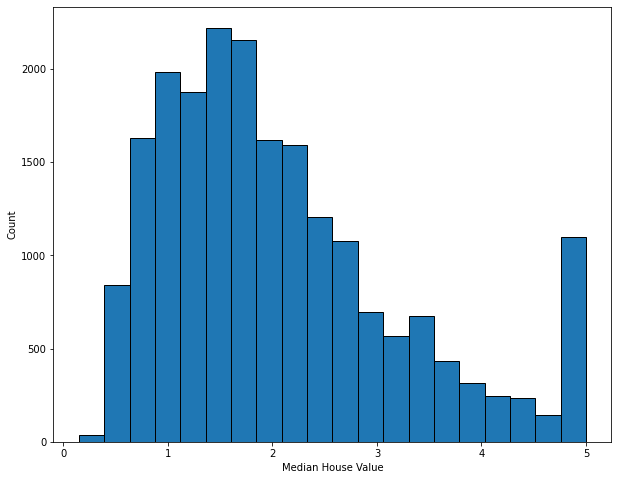

In [65]:
# Distribution of the target variable
plt.figure(figsize=(10, 8))
plt.hist(y, bins=20, edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.show()

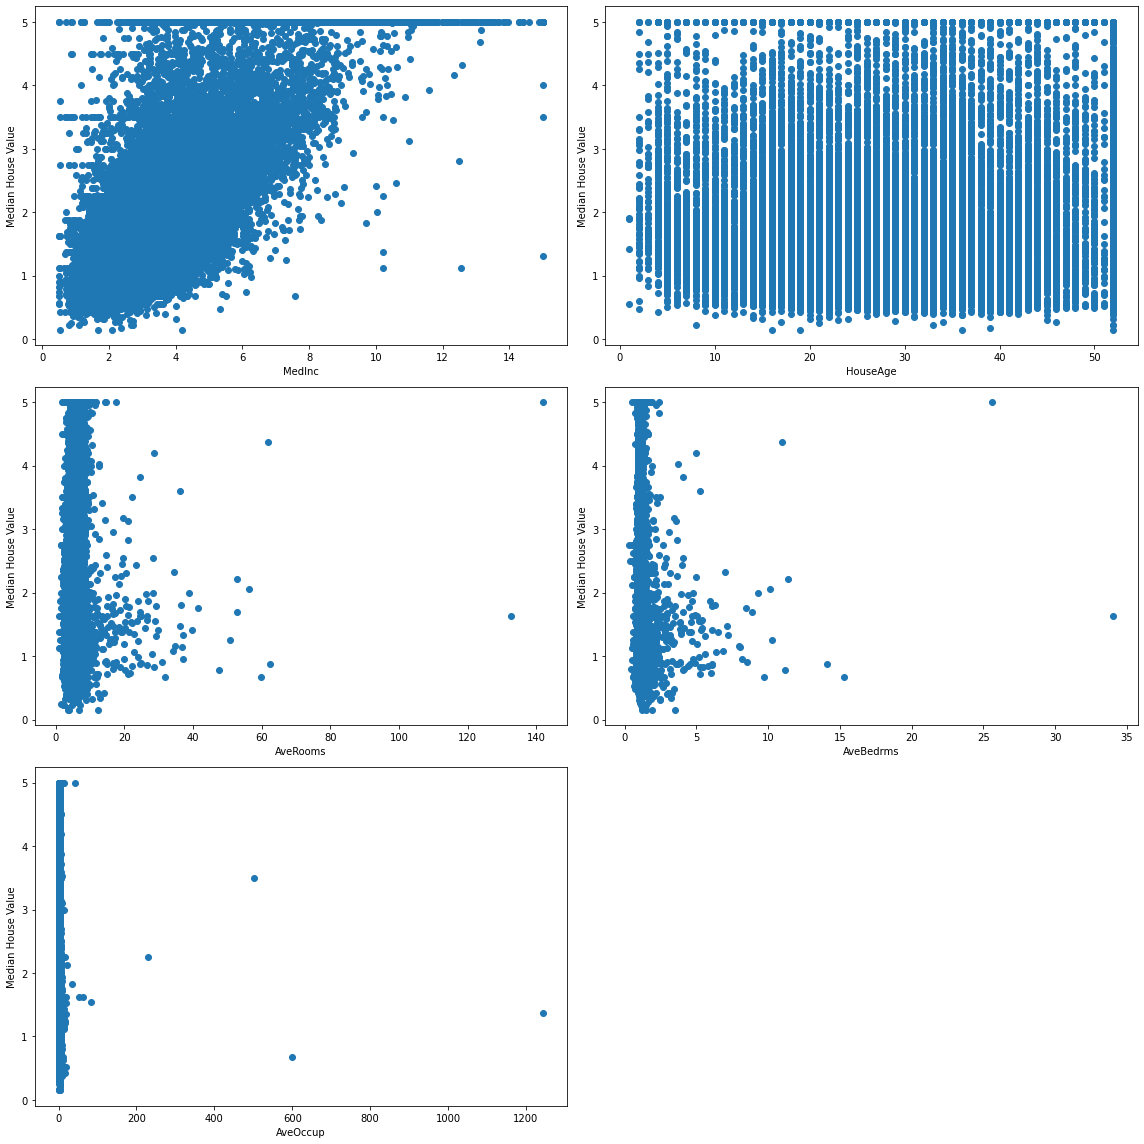

In [66]:
# PLoting the relationships between the features and the target variable
plt.figure(figsize=(16, 16))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

# Machine learning 

In [67]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Predicting the test set
y_pred = tree.predict(X_test)

# Calculating the mean absolute error 
mae_train = mean_absolute_error(y_train, tree.predict(X_train)).round(2)
mae_test = mean_absolute_error(y_test, y_pred).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")

Mean absolute error on training set: 0.58
Mean absolute error on test set: 0.6


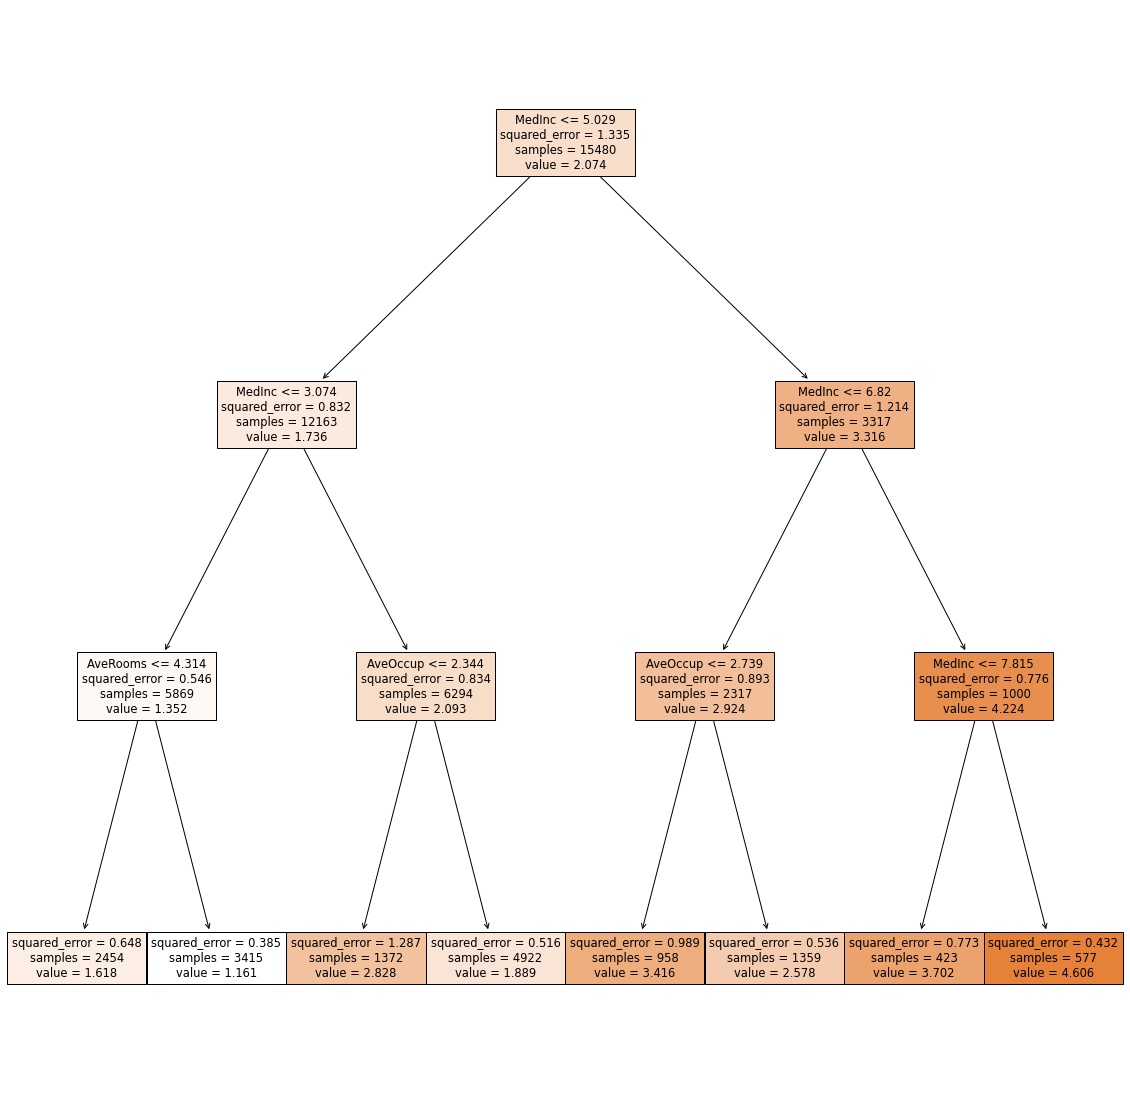

In [68]:
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [69]:
# Entries in the nodes 
n_entries = {
    "node 1": 15480,
    "node 2": 12163,
    "node 3": 3317,
    "node 4": 5869,
    "node 5": 6294,
    "node 6": 2317,
    "node 7": 1000, 
    "node 8": 2454,
    "node 9": 3415,
    "node 10": 1372,
    "node 11": 4922,
    "node 12": 958,
    "node 13": 1359,
    "node 14": 423,
    "node 15": 577
}

# Nodes squared errors
i_sq = {
    "node 1": 1.335,
    "node 2": 0.832,
    "node 3": 1.214,
    "node 4": 0.546,
    "node 5": 0.834,
    "node 6": 0.893,
    "node 7": 0.776, 
    "node 8": 0.648,
    "node 9": 0.385,
    "node 10": 1.287,
    "node 11": 0.516,
    "node 12": 0.989,
    "node 13": 0.536,
    "node 14": 0.773,
    "node 15": 0.432
}

# Defining the features used in the nodes that have a splitting rule
feature_in_node = {
    "node 1": "MedInc",
    "node 2": "MedInc",
    "node 3": "MedInc",
    "node 4": "AveRooms",
    "node 5": "AveOccup",
    "node 6": "AveOccup",
    "node 7": "MedInc"
}

# The first node's count is the total number of entries in the tree
_n = n_entries["node 1"]

# Calculating the n entries probability
n_entries_weight = {}
for node in n_entries:
    n_entries_weight[node] = n_entries[node] / _n

# Defining the relationship between nodes; 
# The key is the parent node, and the value is a list of 
# [left child node, right child node]
node_pairs = {
    "node 1": ["node 2", "node 3"],
    "node 2": ["node 4", "node 5"],
    "node 3": ["node 6", "node 7"],
    "node 4": ["node 8", "node 9"],
    "node 5": ["node 10", "node 11"],
    "node 6": ["node 12", "node 13"],
    "node 7": ["node 14", "node 15"]
}

In [70]:
def node_importance(
    node_main: str, 
    node_left: str, 
    node_right: str, 
    n_entries_weight: dict, 
    i_sq: dict
    ) -> float:
    """
    Calculated the importance of the node_main
    
    Arguments
    ---------
    node_main: str
        The main parent node
    node_left: str
        The left child node
    node_right: str
        The right child node
    n_entries_weight: dict
        The weight of each node, calculated by the samples in node divided by the total number of samples
    i_sq: dict
        The squared error of each node

    Returns
    -------
    float
        The importance of the node_main
    """
    # Calculating the main nodes part of the equation 
    _main_part = n_entries_weight[node_main] * i_sq[node_main]

    # Calculating the left child nodes part of the equation
    _left_part = n_entries_weight[node_left] * i_sq[node_left]

    # Calculating the right child nodes part of the equation
    _right_part = n_entries_weight[node_right] * i_sq[node_right]

    # Returning the gain of the node_main; This gain is the importance of the node_main
    return _main_part - _left_part - _right_part

In [71]:
# Calculating the importance of each node
importance = {}
for node in node_pairs:
    importance[node] = round(node_importance(node, *node_pairs[node], n_entries_weight, i_sq), 3)

print(f"Node importance: {importance}")

# Going from node importance to feature importance
feature_importance = {}
for node in node_pairs: 
    # Extracting the feature name 
    _ft_name = feature_in_node[node]

    # Extracting the feature importance
    _ft_imp = importance[node]

    # Adding the feature importance to the feature importance dictionary
    if _ft_name in feature_importance:
        feature_importance[_ft_name] += _ft_imp
    else:
        feature_importance[_ft_name] = _ft_imp

# Adding any missing features 
for feature in features:
    if feature not in feature_importance:
        feature_importance[feature] = 0

print(f"Feature importance before normalization: {feature_importance}")

# Dividing the feature importance by the sum of importances
_sum_importance = sum(feature_importance.values())
for feature in feature_importance:
    feature_importance[feature] = round(feature_importance[feature]/_sum_importance, 3)

print(f"Feature importance after normalization: {feature_importance}")

Node importance: {'node 1': 0.421, 'node 2': 0.108, 'node 3': 0.076, 'node 4': 0.019, 'node 5': 0.061, 'node 6': 0.025, 'node 7': 0.013}
Feature importance before normalization: {'MedInc': 0.618, 'AveRooms': 0.019, 'AveOccup': 0.086, 'HouseAge': 0, 'AveBedrms': 0}
Feature importance after normalization: {'MedInc': 0.855, 'AveRooms': 0.026, 'AveOccup': 0.119, 'HouseAge': 0.0, 'AveBedrms': 0.0}


# Scikit-learn pipeline 

In [72]:
# Loading the data
_cali_data = fetch_california_housing(as_frame=True)
X, y = _cali_data.data, _cali_data.target

# Droping the geo coordinate featuress
X = X.drop(columns=['Latitude', 'Longitude'])

# Droping the population feature; In real life modeling, this could be used as weight. 
# For educational and inference purposes, we drop it.
X = X.drop(columns=['Population'])

# Saving the feature names 
features = X.columns.tolist()

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'MedInc': 0.854, 'HouseAge': 0.0, 'AveRooms': 0.027, 'AveBedrms': 0.0, 'AveOccup': 0.12}


In [73]:
# Creating a dataframe with the feature importance by our method and the sklearn method
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Feature importance our code": [feature_importance[feature] for feature in features],
    "Feature importance by sklearn": [feature_importance_sk[feature] for feature in features]
}).sort_values('Feature importance our code', ascending=False)

In [74]:
feature_importance_df

,Feature,Feature importance our code,Feature importance by sklearn
0,MedInc,0.855,0.854
4,AveOccup,0.119,0.120
2,AveRooms,0.026,0.027
1,HouseAge,0.000,0.000
3,AveBedrms,0.000,0.000
